In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
from scipy.integrate import odeint
#help(odeint)    # Uncomment to view the help file for this function

tau = 1
cMa0 = 1.57e8
t0 = 0.5
ts = 1e3
tf = 4.4
# Define a function which calculates the derivative
def dcMa_dt(cMa,t):
    return -cMa/tau

t = np.linspace(t0,4.4,ts)
cMa = odeint(dcMa_dt, cMa0, t)
t = np.append(np.linspace(0,t0,ts*(t0)/(tf-t0)), t)
cMa = np.array(cMa).flatten()
cMa_t_initial = np.empty(len(np.linspace(0,t0,ts*(t0)/(tf-t0))))
cMa_t_initial.fill(cMa0)
cMa = np.append(cMa_t_initial, cMa)
print(cMa)

[  1.57000000e+08   1.57000000e+08   1.57000000e+08 ...,   3.20289002e+06
   3.19041062e+06   3.17797984e+06]


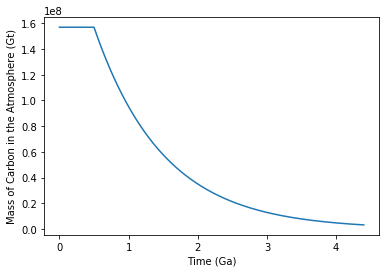

In [102]:
plt.plot(t, cMa)
plt.xlabel("Time (Ga)")
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)");

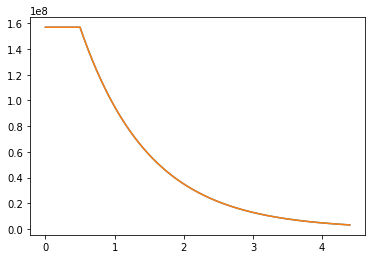

In [4]:
cMa_exact = np.piecewise(t, [t <= t0, t > t0], [lambda t: cMa0, lambda t: cMa0*np.exp((t0-t)/tau)])
plt.plot(t, cMa, t, cMa_exact, "-");


1.46032379059


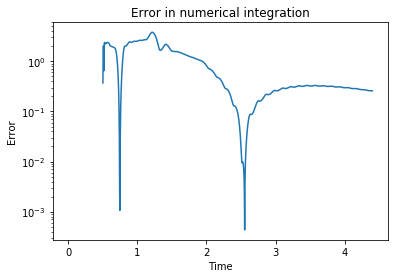

In [5]:
from numpy.linalg import norm
cMa_diff = np.abs(cMa_exact - cMa)
plt.semilogy(t, cMa_diff)
plt.ylabel("Error")
plt.xlabel("Time")
plt.title("Error in numerical integration");
print(numpy.sum(numpy.square(cMa_diff))/len(cMa_diff))


In [84]:
#cMa(t) = cMa_t0 * (1 -cFacc*[t-t0])

#1.1e4 = 1.57e8*(1-cFacc*(450e-3))
def calculate_cFacc(cMa, t):
    return (-cMa/(1.57e8) + 1)/(t)
print(calculate_cFacc(1.1e4,450e-3))
print(calculate_cFacc(1e3, 3.2))
print(calculate_cFacc(5e4, 2))
print(1.57e8/(4.4-0.5))

2.22206652512385
0.3124980095541401
0.49984076433121016
40256410.256410256


In [90]:
from scipy.integrate import odeint
#help(odeint)    # Uncomment to view the help file for this function

tau = 1
cMa0 = 1.57e8
t0 = 0.5
ts = 1e4
tf = 4.4
# Define a function which calculates the derivative
def dcMa_dt(cMa,t):
    #if (t0 <= t and t < 450e-3):
    #return -0
    #elif (450e-3 <= t and t < 3.5):
    #    return -calculate_cFacc(1.1e4,450e-3)
    #else:
    #    return -calculate_cFacc(1e3, 3.2)
    return -cMa0/(2-t0)

t = np.linspace(t0,4.4,ts)
cMa = odeint(dcMa_dt, cMa0, t)
t = np.append(np.linspace(0,t0,ts*(t0)/(tf-t0)), t)
cMa = np.array(cMa).flatten()
cMa_t_initial = np.empty(len(np.linspace(0,t0,ts*(t0)/(tf-t0))))
cMa_t_initial.fill(cMa0)
cMa = np.append(cMa_t_initial, cMa)
print(cMa)
print(t)

[  1.57000000e+08   1.57000000e+08   1.57000000e+08 ...,  -2.51118352e+08
  -2.51159176e+08  -2.51200000e+08]
[  0.00000000e+00   3.90320062e-04   7.80640125e-04 ...,   4.39921992e+00
   4.39960996e+00   4.40000000e+00]


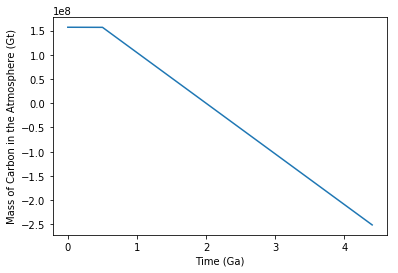

In [91]:
plt.plot(t, cMa)
#for a,b in zip(t, cMa): 
#    plt.text(a, b, str(b))
#axes = plt.gca()
#axes.set_yscale('log')
#ax1.set_yticks([0,1e8,2e8,3e8,4e8])
#axes.set_ylim([min(cMa), max(cMa)])

plt.xlabel("Time (Ga)")
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)");

In [96]:
(1 - (1e5/1.57e8))*2 + 0.5

2.4987261146496813

In [105]:
from scipy.integrate import odeint
#help(odeint)    # Uncomment to view the help file for this function

tau = 0.5
cMa0 = 1e5
t0 = 2.4987
ts = 1e4
tf = 4.4
# Define a function which calculates the derivative
def dcMa_dt(cMa,t):
    #if (t0 <= t and t < 450e-3):
    #return -0
    #elif (450e-3 <= t and t < 3.5):
    #    return -calculate_cFacc(1.1e4,450e-3)
    #else:
    #    return -calculate_cFacc(1e3, 3.2)
    return -cMa/tau

t = np.linspace(t0,4.4,ts)
cMa = odeint(dcMa_dt, cMa0, t)
t = np.append(np.linspace(0,t0,ts*(t0)/(tf-t0)), t)
cMa = np.array(cMa).flatten()
cMa_t_initial = np.empty(len(np.linspace(0,t0,ts*(t0)/(tf-t0))))
cMa_t_initial.fill(cMa0)
cMa = np.append(cMa_t_initial, cMa)
print(cMa)
print(t)

[ 100000.          100000.          100000.         ...,    2232.96593276
    2232.11690167    2231.2681934 ]
[  0.00000000e+00   1.90145347e-04   3.80290693e-04 ...,   4.39961970e+00
   4.39980985e+00   4.40000000e+00]


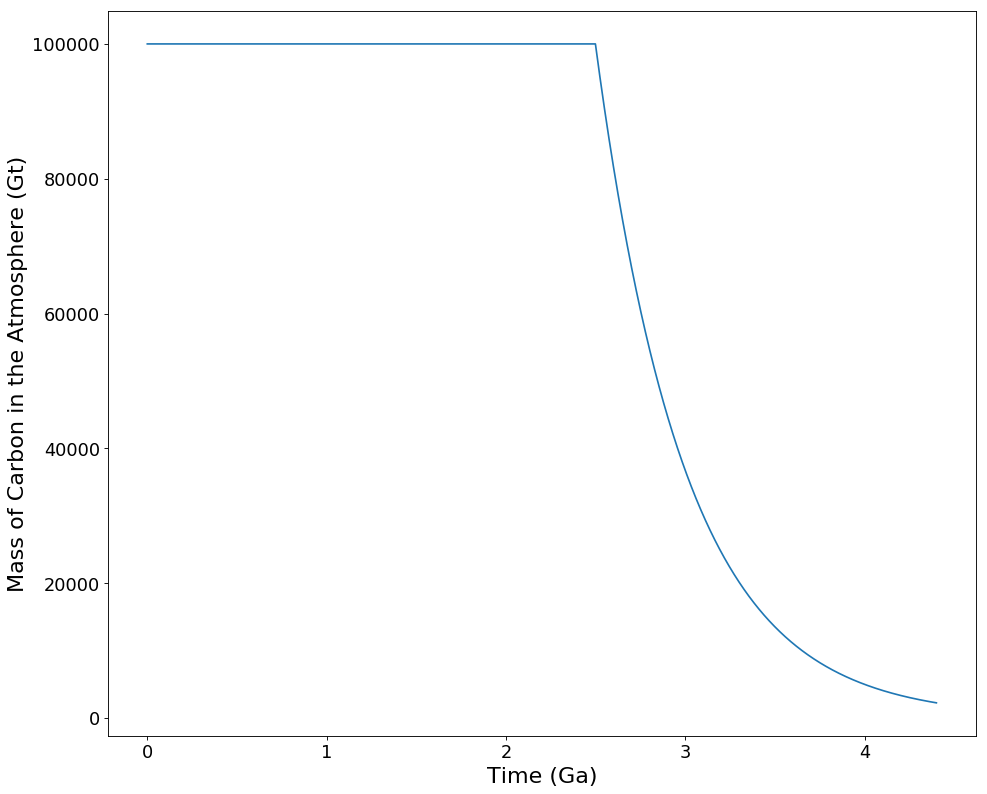

In [116]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, cMa)
#axes = plt.gca()
#axes.set_yscale('log')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)

plt.xlabel("Time (Ga)", fontsize=20)
plt.ylabel("Mass of Carbon in the Atmosphere (Gt)", fontsize=20);